# Mount the drive


In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive/Process mining course/8_knn_svm_classification')

Mounted at /content/drive


# K-NN Import the libraries


In [2]:
# import libraries
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# K-NN Import the dataset


In [3]:
# import the dataset
df = pd.read_csv(r'Social_Network_Ads_Logistic.csv')

print(df)
# separate dependent variable
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values


     Age  EstimatedSalary  Purchased
0     19            19000          0
1     35            20000          0
2     26            43000          0
3     27            57000          0
4     19            76000          0
..   ...              ...        ...
395   46            41000          1
396   51            23000          1
397   50            20000          1
398   36            33000          0
399   49            36000          1

[400 rows x 3 columns]


# K-NN Splitting the dataset into the training set and test set

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

# K-NN Feature Scaling

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # we use the fit_transform method here so we calculate the meand stdev for X_train and scale the data accordingly
X_test_scaled = scaler.transform(X_test) # we call the transform method here so that scaling is consistent across both training and test data

#K-NN - Training the K-nn model on the Training set

In [6]:
classifier = KNeighborsClassifier(n_neighbors=5, metric='cityblock') # don't have to set p parameter
classifier.fit(X_train_scaled,y_train)


KNeighborsClassifier(metric='cityblock')

#K-NN - Predicting a new result

In [7]:
new_sample = np.array([[30,8700]])
new_sample_scaled = scaler.transform(new_sample)
new_prediction = classifier.predict(new_sample_scaled)
print("New sample prediction for independent variables", new_sample, "is:", new_prediction)

New sample prediction for independent variables [[  30 8700]] is: [0]


#K-NN - Predict the Test set results

In [8]:
y_pred = classifier.predict(X_test_scaled)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test), 1)),1))


[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]]


#K-NN - Make the Confusion Matrix

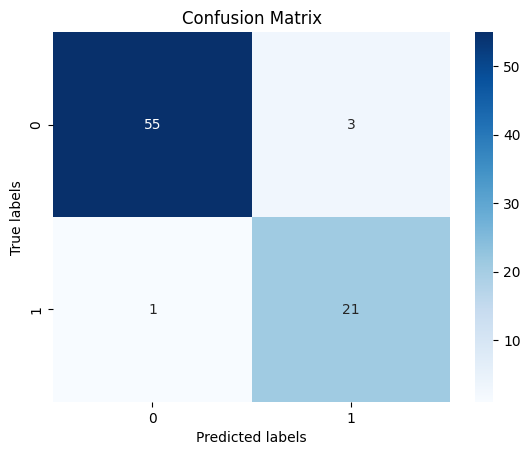

In [9]:
cm =  confusion_matrix(y_test, y_pred)

# display cm as heatmap
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

#K-NN - Visualize the Training set results

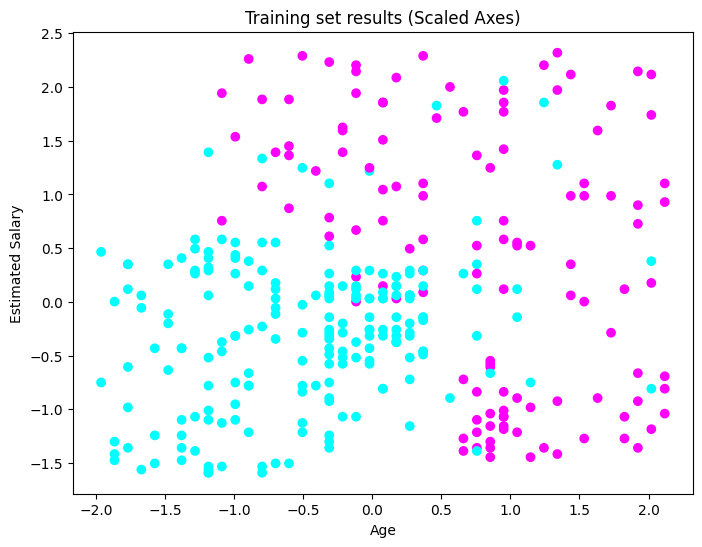

In [10]:
# Visualize the training set results

plt.figure(figsize=(8, 6))
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap='cool')
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.title("Training set results (Scaled Axes)")
plt.show()

# KNN Visualize the test set results

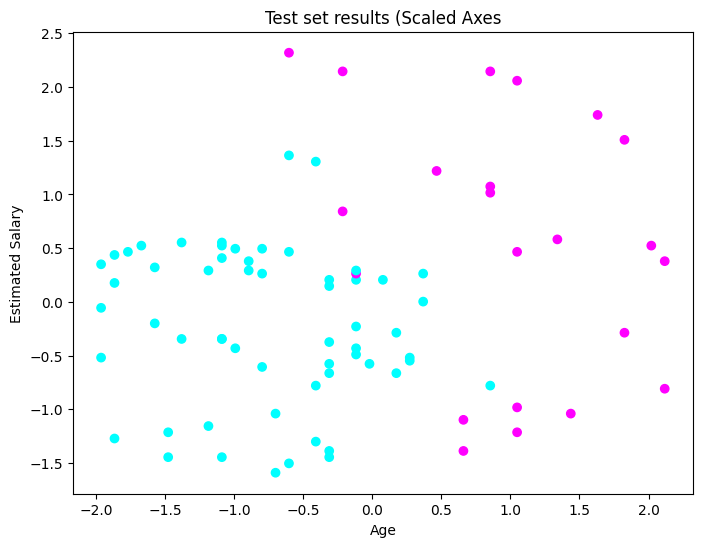

Accuracy: 0.95


In [11]:
# Visualize the test set results
plt.figure(figsize=(8, 6))
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test, cmap='cool')
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.title("Test set results (Scaled Axes")
plt.show()

# calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


# SVM - Importing the libraries


In [12]:
#%reset
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix


# SVM - Importing the dataset

In [13]:
# import the dataset
df = pd.read_csv(r'Social_Network_Ads_Logistic.csv')

print(df)
# separate dependent variable
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

     Age  EstimatedSalary  Purchased
0     19            19000          0
1     35            20000          0
2     26            43000          0
3     27            57000          0
4     19            76000          0
..   ...              ...        ...
395   46            41000          1
396   51            23000          1
397   50            20000          1
398   36            33000          0
399   49            36000          1

[400 rows x 3 columns]


#SVM - Splitting the dataset into the Training set and Test set

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

# SVM - Feature scaling

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#SVM Train the SVM Model

In [16]:
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=0)

# SVM - Predict a new result

In [17]:
new_sample = np.array([[30,8700]])
new_sample_scaled = scaler.transform(new_sample)
new_prediction = classifier.predict(new_sample_scaled)
print("New sample prediction for independent variables", new_sample, "is:", new_prediction)

New sample prediction for independent variables [[  30 8700]] is: [0]


# SVM - Predict the test set results

In [18]:
y_pred = classifier.predict(X_test_scaled)

# SVM - Make the confusion matrix

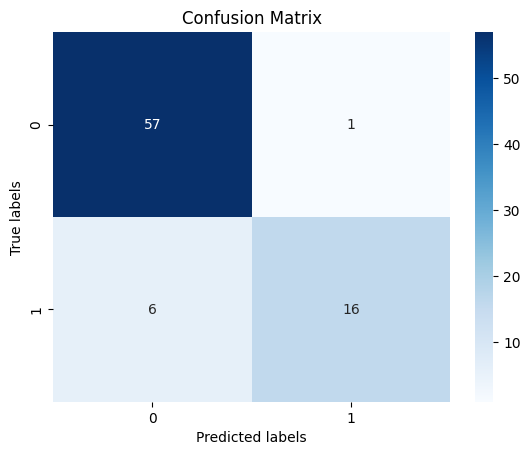

In [19]:
cm =  confusion_matrix(y_test, y_pred)

# display cm as heatmap
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()